<a href="https://colab.research.google.com/github/karim-mammadov/SaiKet_Systems_Tasks/blob/main/Task_4_Churn_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 4:**

**Churn Prediction Model Description:**


Choose suitable machine learning algorithms
(e.g., logistic regression, decision trees) for
churn prediction. Split data into training and
testing sets, train and evaluate multiple
models using metrics like accuracy, precision,
recall, and F1-score. Perform feature selection
and hyperparameter tuning for optimal
performance.

**Import Libraries**

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv("/content/Telco_Customer_Churn_Dataset  (3).csv")
print("Initial shape:", df.shape)
print(df.head())

Initial shape: (7043, 21)
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingM

**Preprocessing**

**Drop customerID**

In [7]:
df = df.drop("customerID", axis=1)

**Convert TotalCharges to numeric**

In [8]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

**Fill missing values**

In [9]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('Churn')

In [10]:
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

**One-hot encoding for categorical variables**

In [11]:
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

**Encode target**

In [12]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

print("Preprocessing completed. Shape:", df.shape)

Preprocessing completed. Shape: (7043, 31)


**Split Data into Train and Test**

In [13]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [14]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [16]:
print("Data split done. Train shape:", X_train.shape, "Test shape:", X_test.shape)

Data split done. Train shape: (5634, 30) Test shape: (1409, 30)


**Feature Scaling**

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Feature scaling completed.")

Feature scaling completed.


**Train Logistic Regression Model**

In [18]:
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)
y_pred_lr = logreg.predict(X_test_scaled)

**Train Decision Tree Model**

In [19]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)
y_pred_dt = dtree.predict(X_test)

**Evaluate Models**

In [20]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"=== {model_name} Evaluation ===")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print(classification_report(y_true, y_pred))

In [21]:
evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_dt, "Decision Tree")

=== Logistic Regression Evaluation ===
Accuracy: 0.8069552874378992
Precision: 0.6583850931677019
Recall: 0.5668449197860963
F1 Score: 0.6091954022988506
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.57      0.61       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409

=== Decision Tree Evaluation ===
Accuracy: 0.7416607523066004
Precision: 0.5138888888888888
Recall: 0.4946524064171123
F1 Score: 0.5040871934604905
              precision    recall  f1-score   support

           0       0.82      0.83      0.83      1035
           1       0.51      0.49      0.50       374

    accuracy                           0.74      1409
   macro avg       0.67      0.66      0.66      1409
weighted avg       0.74      0.74      0.74      1409



**Hyperparameter Tuning (Optional)**

**Example for Decision Tree**

In [22]:
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(
    dtree, param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1
)
grid_search.fit(X_train, y_train)
print("Best Decision Tree params:", grid_search.best_params_)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best Decision Tree params: {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [23]:
best_tree = grid_search.best_estimator_
y_pred_best_tree = best_tree.predict(X_test)
evaluate_model(y_test, y_pred_best_tree, "Tuned Decision Tree")

=== Tuned Decision Tree Evaluation ===
Accuracy: 0.7920511000709723
Precision: 0.6246153846153846
Recall: 0.5427807486631016
F1 Score: 0.580829756795422
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1035
           1       0.62      0.54      0.58       374

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409



**Import XGBoost Library**

In [24]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

**Build XGBoost Classifier with scale_pos_weight**
**compute imbalance ratio**

In [25]:
pos_weight = sum(y_train==0)/sum(y_train==1)

In [26]:
xgb = XGBClassifier(
    random_state=42,
    scale_pos_weight=pos_weight,
    use_label_encoder=False,
    eval_metric='logloss'
)

**Hyperparameter Grid**

In [27]:
xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2]
}

**GridSearchCV for XGBoost**

In [28]:
xgb_grid = GridSearchCV(
    estimator=xgb,
    param_grid=xgb_params,
    scoring='f1',
    cv=3,
    n_jobs=-1
)

xgb_grid.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [11:06:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200]},
             scoring='f1')

**Predictions**

In [29]:
y_pred_xgb = xgb_grid.predict(X_test)

**Evaluation**

In [30]:
print("=== Tuned XGBoost Evaluation ===")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

=== Tuned XGBoost Evaluation ===
Accuracy: 0.7494677075940384
Precision: 0.5181347150259067
Recall: 0.8021390374331551
F1 Score: 0.6295907660020986
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1035
           1       0.52      0.80      0.63       374

    accuracy                           0.75      1409
   macro avg       0.71      0.77      0.72      1409
weighted avg       0.81      0.75      0.76      1409



**Comparison of Models**

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Create a DataFrame with metrics**

In [34]:
metrics_df = pd.DataFrame({
    'Model': ['Decision Tree', 'XGBoost'],
    'Accuracy': [0.792, 0.749],
    'Precision_Churn1': [0.625, 0.518],
    'Recall_Churn1': [0.543, 0.802],
    'F1_Churn1': [0.581, 0.630]
})

print("Model Comparison Table:")
print(metrics_df)

Model Comparison Table:
           Model  Accuracy  Precision_Churn1  Recall_Churn1  F1_Churn1
0  Decision Tree     0.792             0.625          0.543      0.581
1        XGBoost     0.749             0.518          0.802      0.630


**Visualize metrics**

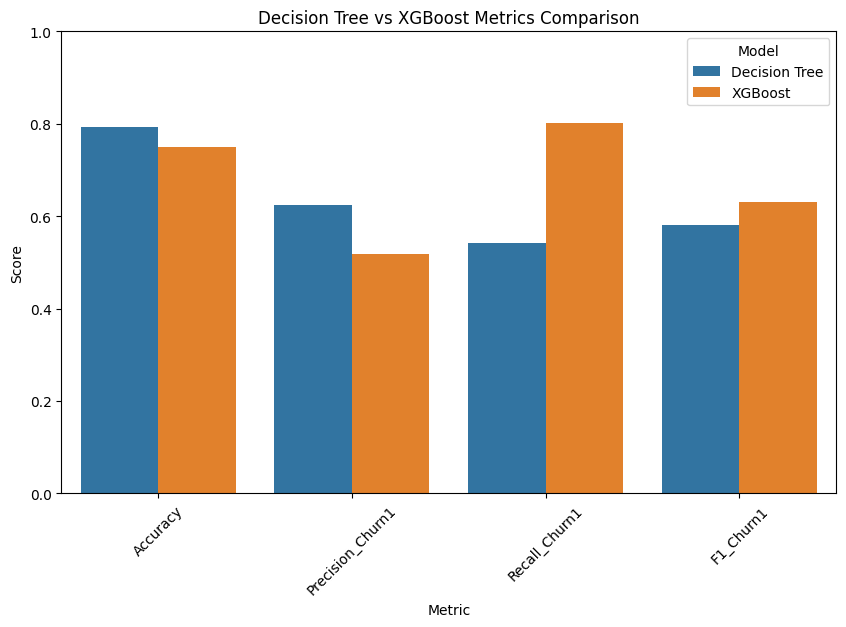

In [35]:
plt.figure(figsize=(10,6))
metrics_melted = metrics_df.melt(id_vars='Model', var_name='Metric', value_name='Score')
sns.barplot(x='Metric', y='Score', hue='Model', data=metrics_melted)
plt.title("Decision Tree vs XGBoost Metrics Comparison")
plt.ylim(0,1)
plt.ylabel("Score")
plt.xlabel("Metric")
plt.xticks(rotation=45)
plt.legend(title='Model')
plt.show()